In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(image):
    if len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[-1] == 1):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Transformacje


### Skalowanie
Skalowanie to zmiana wielkości obrazu. OpenCV posiada w tym celu funkcję cv2.resize(). Rozmiar obrazu można określić ręcznie lub można określić współczynnik skalowania. Stosowane są różne metody interpolacji. Preferowanymi metodami interpolacji są cv2.INTER_AREA dla zmniejszania oraz cv2.INTER_CUBIC (wolna) i cv2.INTER_LINEAR dla powiększania. Domyślnie, metodą interpolacji jest cv2.INTER_LINEAR dla wszystkich zmian rozmiaru. Wielkość obrazu można zmienić za pomocą jednej z poniższych metod: 

In [2]:
image = cv2.imread('agh_cv/opencv_logo.png')
#argumenty: source, docelowy wymiar, scale factor po x i y, typ interpolacji
bigger_image = cv2.resize(image,None,fx=3, fy=2, interpolation = cv2.INTER_CUBIC)
smaller_image = cv2.resize(image, (50, 50), interpolation = cv2.INTER_AREA)

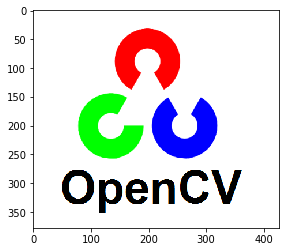

(378, 428, 3)


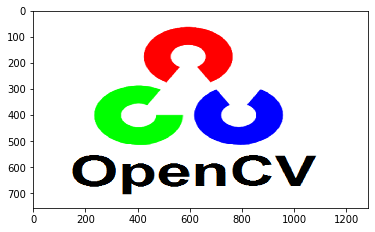

(756, 1284, 3)


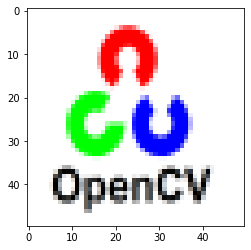

(50, 50, 3)


In [3]:
imshow(image)
plt.show()
print(image.shape)

imshow(bigger_image)
plt.show()
print(bigger_image.shape)

imshow(smaller_image)
plt.show()
print(smaller_image.shape)

### Translacja
Translacja to przesunięcie obiektu. Jeśli znasz przesunięcie w kierunku $(x,y)$, (będzie to $(t_x,t_y)$), możesz utworzyć macierz przekształceń M w następujący sposób:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$

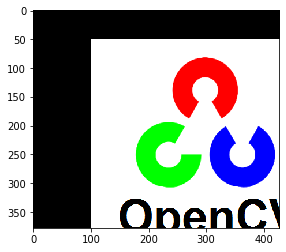

In [4]:
image = cv2.imread('agh_cv/opencv_logo.png')
rows,cols, _ = image.shape
#implementacja tej macierzy ze wzoru powyżej
transformation_matrix = np.float32([[1,0,100],[0,1,50]])
#trzeci argument - rozmiar obrazu wyjściowego
result = cv2.warpAffine(image, transformation_matrix, (cols,rows))
imshow(result)

Trzeci argument funkcji cv2.warpAffine() to rozmiar obrazu wyjściowego, który powinien mieć postać **(szerokość, wysokość)**. Zapamiętaj szerokość = liczba kolumn, a wysokość = liczba wierszy.

### Rotacja
Obrót obrazu dla kąta $θ$ jest osiągany przez macierz transformacji: $$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$$

Ale OpenCV zapewnia skalowany obrót z regulowanym środkiem obrotu, dzięki czemu można go obracać w dowolnym miejscu. Zmodyfikowana macierz transformacji jest podawana przez

$$\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}$$
gdzie
$$\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}$$

Aby znaleźć tę macierz transformacji, OpenCV udostępnia funkcję, __cv2.getRotationMatrix2D__. Sprawdź poniższy przykład, który obraca obraz o 90 stopni względem środka bez żadnego skalowania. 

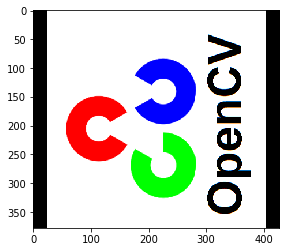

In [5]:
image = cv2.imread('agh_cv/opencv_logo.png')
rows,cols, _ = image.shape

rotation_point = (cols / 2, rows / 2) #ustawiamy rotację na środku
angle = 90
scale = 1
#wyznaczanie tej macierzy rotacji z powyżej -> dajemy punkt rotacji, kąt i skalę
transformation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, scale)

#podobnie jak przy przemieszczaniu funkcja warpAffine
result = cv2.warpAffine(image, transformation_matrix, (cols,rows))
imshow(result)

Problem? Ucięty obraz

### Transformacja afiniczna
W przekształceniu afinicznym, wszystkie linie równoległe na oryginalnym obrazie będą nadal równoległe na obrazie wyjściowym. Aby znaleźć macierz transformacji, potrzebujemy trzech punktów z obrazu wejściowego i odpowiadających im lokalizacji w obrazie wyjściowym. Następnie funkcja __cv2.getAffineTransform__ utworzy macierz 2x3, która zostanie przekazana wykorzystana w znanej już funkcji __cv2.warpAffine__.

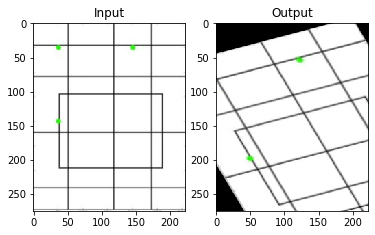

In [6]:
image = cv2.imread('agh_cv/affine.png')
rows,cols,_ = image.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

transformation_matrix = cv2.getAffineTransform(pts1, pts2)

result = cv2.warpAffine(image, transformation_matrix, (cols,rows))

plt.subplot(121),imshow(image), plt.title('Input')
plt.subplot(122),imshow(result), plt.title('Output')
plt.show()

### Transformacja perspektywiczna
Do przeprowadzenia transformacji perspektywicznej potrzebna jest macierz transformacji 3x3. Do znalezienia tej macierzy przekształceń potrzebne są 4 punkty na obrazie wejściowym i odpowiadające im punkty na obrazie wyjściowym. Spośród tych 4 punktów, 3 z nich nie powinny być współliniowe. Następnie macierz transformacji można znaleźć za pomocą funkcji __cv2.getPerspectiveTransform__, którą następnie należy zastosować w funkcji  __cv2.warpPerspective__.


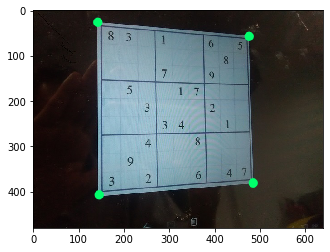

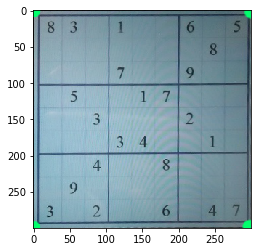

In [7]:
image = cv2.imread('agh_cv/sudoku.png')
rows,cols,_ = image.shape

pts1 = np.float32([[140,25],[475,56],[143,409],[487,383]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

transformation_matrix = cv2.getPerspectiveTransform(pts1,pts2)

result = cv2.warpPerspective(image, transformation_matrix, (300,300))

imshow(image)
plt.show()
imshow(result)

### Zadanie 1
Jak pewnie zwróciliście uwagę po przesunięciu obrazu w sekcji 'Translacja' pozostały czarne pasy. Napisz funkcję, która wykona inną wersję translacji, w taki sposób, że:
- Dokona translacji w taki sposób jak poprzedni
- Z otrzymanego wyniku wybierze tylko pozostały obszar oryginalnego obrazu. (Bez czarnych pasów)


(378, 428, 3)
(428, 378, 3)


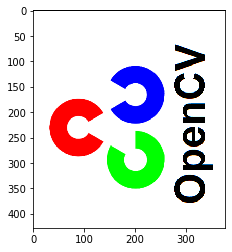

In [8]:
image = cv2.imread('agh_cv/opencv_logo.png')

def rotate90(image):
    rows,cols, _ = image.shape
    print(image.shape)
    rotation_point = (cols // 2, rows // 2) #ustawiamy rotację na środku
    angle = 90
    scale = 1
    #wyznaczanie tej macierzy rotacji z powyżej -> dajemy punkt rotacji, kąt i skalę
    transformation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, scale)
    transformation_matrix[0, 2] += (rows - cols) / 2
    transformation_matrix[1, 2] += (cols - rows) / 2

    #podobnie jak przy przemieszczaniu funkcja warpAffine
    result = cv2.warpAffine(image, transformation_matrix, (rows,cols))
    print(result.shape)
    return result

imshow(rotate90(image))



### Zadanie 2
Wczytaj plik 'agh_cv/agh.png' i wykonaj na nim operację modyfikacji rozmiaru wykorzystując dwie poznane przez siebie metody.

- Rezultatem ma być obraz 2x mniejszy w pionie i 2x mniejszy w poziomie
- Rezultatem ma być obraz 2x większy w pionie i 2x większy w poziomie
- Rezultatem ma być obraz o wymiarach 400x400 pixeli
- Sprawdź akceptowalną minimalną wielkość dla której rozpoznasz budynek :)



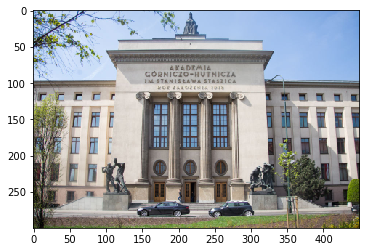

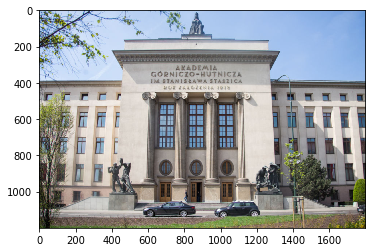

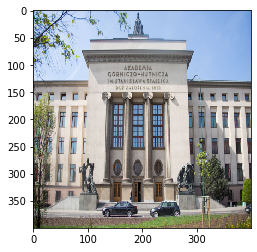

In [9]:
agh = cv2.imread('agh_cv/agh.png')
smaller_image = cv2.resize(agh, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
bigger_image = cv2.resize(agh,None,fx=2, fy=2, interpolation = cv2.INTER_LINEAR)
resize_image = cv2.resize(agh,(400,400), interpolation = cv2.INTER_LINEAR)
imshow(smaller_image)
plt.show()
imshow(bigger_image)
plt.show()
imshow(resize_image)


### Zadanie 3
- Wczytaj zdjęcie 'agh_cv/sudoku2.png
- Wyświetl na ekran wykorzystując bibliotekę matplotlib
- Biorąc pod uwagę wielkość obrazu, spróbuj wybrać metodą "na oko" współrzędne czterech punktów odpowiadających łamigłówce sudoku znajdującej się na zdjęciu
- Wykonaj transformatę perspektywiczną dla obranych punktów. Dobierz takie punkty, żeby osiagnąć rezultat podobny do przykładu.

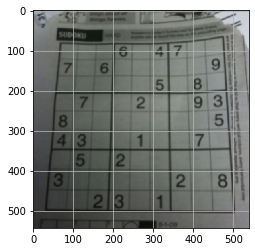

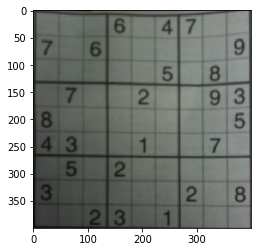

In [12]:
sudoku = cv2.imread('agh_cv/sudoku2.png')
imshow(sudoku)
plt.grid()
plt.show()

rows,cols,_ = sudoku.shape

pts1 = np.float32([[65,80],[475,70],[30,500],[500,500]])
pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])

transformation_matrix = cv2.getPerspectiveTransform(pts1,pts2)

result = cv2.warpPerspective(sudoku, transformation_matrix, (400,400))

imshow(result)